In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_path = "C:\\Users\\Sam Yu\\Desktop\\School\\Fall2021\\Phys_437A_Research_Project\\datasets\\r=14\\annulus_R25_r14_n_20_k_20.0_HardBC\\instanceRun"

In [3]:
import sys
sys.path.append("C:\\Users\\Sam Yu\\Documents\\GitHub\\LiquidCrystals")

In [4]:
from postprocessing import LCSystem

In [5]:
from pprint import pprint
lc = LCSystem(lc_data_path=dataset_path)

pprint(vars(lc))

{'sim_params': {'# of Ellipse': 20.0,
                'Acceptance Rate': 0.56190755,
                'Accepted Moves': 22476302.0,
                'Monte Carlo steps': 2000000.0,
                'R': 25.0,
                'Semi Major Axis': 5.0,
                'Semi Minor Axis': 0.25,
                'Total Moves': 40000000.0,
                'd_ang / step size': 0.4806207327119736,
                'd_pos / step size': 0.43255865944077626,
                'r': 14.0,
                'reduced density': 0.05827505827505827},
 'system_state_at_step': {0: [(-12.783788293462402,
                               9.239833911454408,
                               4.195185030716375),
                              (17.230758489201097,
                               -11.720022072147813,
                               4.5734015668920796),
                              (-18.0172796487233,
                               -13.66420871008296,
                               5.529988928561718),
           

                                   (13.063596171951092,
                                    -11.702573103618384,
                                    -75.31899161918378),
                                   (-0.8648785359045069,
                                    -22.11593641766068,
                                    31.2848209613518),
                                   (12.21659710817611,
                                    8.383376872000742,
                                    -29.111533933403514),
                                   (-8.275581090448581,
                                    -21.651478293983597,
                                    -110.10999453417583)],
                          379999: [(3.00827095237269,
                                    -18.485667965814876,
                                    -63.0385701496798),
                                   (-8.541968280271574,
                                    17.47720664230116,
                                    21.61179

                                    25.85699030271698),
                                   (15.418317301110523,
                                    12.674115869984146,
                                    19.768525139362872),
                                   (-22.103353570675242,
                                    4.498702071049048,
                                    -5.287537928803768),
                                   (-21.686478037205443,
                                    -1.8342804419708543,
                                    42.202064215479616),
                                   (17.630045255773894,
                                    5.674570411279489,
                                    -42.478853441838766),
                                   (-17.645716669115284,
                                    -7.339298482827474,
                                    27.135044581195263),
                                   (-12.814245871268177,
                                    -14

                                     -3.8205307270462994),
                                    (-1.00850967022287,
                                     22.68202638888902,
                                     53.36544353383652),
                                    (-17.82265387664371,
                                     -6.3553580554656826,
                                     42.1568008499594),
                                    (-7.313950512040986,
                                     -21.421341952948346,
                                     75.0892392476206),
                                    (4.687551374521607,
                                     -19.999135376401313,
                                     -19.078015354727512),
                                    (2.4361192943174275,
                                     -20.062627246363466,
                                     -50.55447833169282),
                                    (20.258750187106152,
                           

                                     89.18607895151878),
                                    (4.997288623860564,
                                     -18.892534817048684,
                                     -51.34064487991098)],
                          1599999: [(-10.348099510410307,
                                     -16.62373364012849,
                                     -69.19135392195051),
                                    (21.232853417984128,
                                     -1.2239565574474853,
                                     -39.53346833315344),
                                    (15.035028634659493,
                                     1.7933033699861245,
                                     86.41973682136734),
                                    (-19.619251120699747,
                                     -0.7280176934185432,
                                     56.54629249736782),
                                    (15.455012648888534,
                       

                                     60.2442954316011),
                                    (8.334080217538933,
                                     -14.952414793074782,
                                     107.76044017787427),
                                    (5.30514130858824,
                                     19.696127455572338,
                                     -10.617925964173397)],
                          2000000.0: [(13.840903325982525,
                                       4.440283193277436,
                                       -108.09114280494694),
                                      (11.47645424354412,
                                       -19.128756492320832,
                                       -46.52800703916214),
                                      (-12.98020079171675,
                                       -18.99865352082127,
                                       175.2828879697743),
                                      (-2.4295151261718773,
       

In [6]:
params = lc.sim_params
print(params)

{'Monte Carlo steps': 2000000.0, 'R': 25.0, 'r': 14.0, 'd_pos / step size': 0.43255865944077626, 'd_ang / step size': 0.4806207327119736, '# of Ellipse': 20.0, 'reduced density': 0.05827505827505827, 'Semi Minor Axis': 0.25, 'Semi Major Axis': 5.0, 'Accepted Moves': 22476302.0, 'Total Moves': 40000000.0, 'Acceptance Rate': 0.56190755}


In [7]:
outer_radius = params["R"]
inner_radius = params["r"]

print(lc.system_state_at_step[0])

[(-12.783788293462402, 9.239833911454408, 4.195185030716375), (17.230758489201097, -11.720022072147813, 4.5734015668920796), (-18.0172796487233, -13.66420871008296, 5.529988928561718), (18.887338512453898, -3.8216846595183345, 3.391443778671591), (9.741844031397022, -13.824317998508857, 0.7849541824968946), (-0.5772445717221942, 17.476077862972154, 2.9213154833329273), (0.3295722734561624, -19.246256529394138, 1.6805979500146013), (-18.504393399260586, 4.187774914147263, 1.025845631642866), (14.036977589451746, 13.718685769318672, 5.304950301370922), (13.187150784636271, 5.432502587024206, 4.889204939115979), (-19.86550477582043, 8.160498718218308, 0.9466625054570796), (-14.389315132234008, 12.958555881393156, 4.039113189088376), (19.65130891644117, 2.039975761529402, 0.6942446329519307), (-23.18067396446814, -1.1997929456956025, 4.94373371296863), (9.492930585962311, 14.0830726303167, 1.8611926674997825), (-18.545358601106688, -1.8246847010870404, 4.148640539936039), (-9.7043294432319

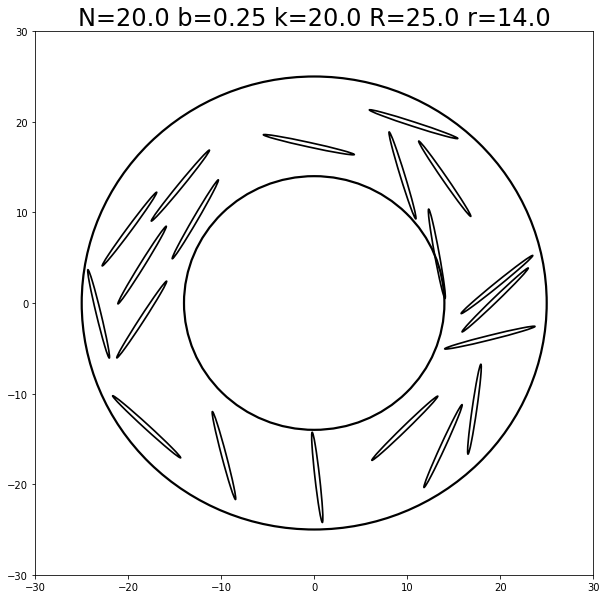

In [8]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

outer_circle = plt.Circle((0,0), outer_radius, color='black', fill=False, linewidth=2.2)
inner_circle = plt.Circle((0,0), inner_radius, color='black', fill=False, linewidth=2.2)

ax.add_patch(inner_circle)
ax.add_patch(outer_circle)

a = params["Semi Major Axis"]
b = params["Semi Minor Axis"]

rad_to_deg = 180 / np.pi

mc_step = 0
for crystal_pos in lc.system_state_at_step[mc_step]:
    crystal = Ellipse(xy=crystal_pos[:-1], angle=rad_to_deg*crystal_pos[-1], width=2*a, height=2*b,
                      linewidth=1.7, color='black', fill=False)
    ax.add_patch(crystal)

circle_pad = 5
plt.xlim(-outer_radius-circle_pad, outer_radius+circle_pad)
plt.ylim(-outer_radius-circle_pad, outer_radius+circle_pad)

plt.rc('font', size=20)
plt.rc('axes', labelsize=20)
    
ax.set_title(f'N={params["# of Ellipse"]} b={b} k={a/b} R={params["R"]} r={params["r"]}')

fig.savefig(f"C:\\Users\\Sam Yu\\Documents\\GitHub\\LiquidCrystals\\snapshots\\snapshot_{mc_step}")

KeyError: 20000

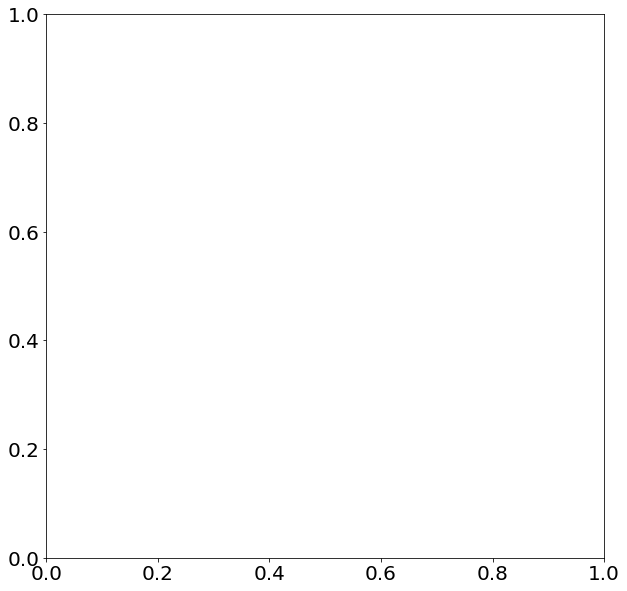

In [11]:
lc.plot_snapshot(20000)